In [1]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

import os
import cv2 as cv

import random
import pickle

In [2]:
def normalize(x):
    x = (x-x.min())/(x.max()-x.min())
    return x

In [3]:
def create_spectrogram(y):
    spec = librosa.feature.melspectrogram(y=y)
    spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv

In [4]:
path_to_dataset = "D:/Projects/Global_AI/UrbanSound8K/audio"

In [5]:
folds = ["fold1","fold2","fold3","fold4","fold5","fold6","fold7","fold8","fold9","fold10",]

Processed 30 | Errors: 0

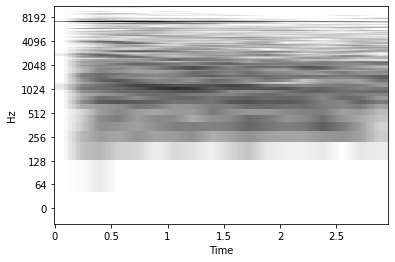

In [6]:
audios = []
errors_file = open("errors.txt", "a")
number = 0
error = 0

for fold in folds:
    aud_per_category = 0
    idx = folds.index(fold)
    for audio in os.listdir(f"{path_to_dataset}/{fold}"):
        aud_per_category += 1
        if aud_per_category == 5:
            break
        if audio == ".DS_Store":
            continue
        path_to_image = f"{path_to_dataset}/{fold}/{audio}"
        idx = int(audio.split("-")[1])
        try:
            y, sr = librosa.load(path_to_image)# audio file is loaded
            
            S_db = create_spectrogram(y)
            
            #img = np.array(librosa.display.specshow(S_db, cmap='gray_r', y_axis='log', x_axis='time'))
            """img should be ndarray. The output of that row cannot be transformed ndarray. """
            
            
            img = cv.resize(S_db, (128,128)) # resize
            img = normalize(img) # normalize

            

            img = librosa.display.specshow(img, cmap='gray_r', y_axis='log', x_axis='time')
            
            audios.append([img, idx])
            
            
            
        except Exception as e:
            error += 1
            errors_file.write(f"{error} | {e}\n")
            
        finally:
            number += 1
        print(f"\rProcessed {number} | Errors: {error}", end="")
errors_file.close()

## Dataset is shuffled to increase randomness

In [7]:
for _ in range(10):
    random.shuffle(audios)

In [8]:
x = []
y = []

for audio, idx in audios:
    x.append(audio)
    y.append(idx)

## train, value and test data sets are created

In [9]:
X_train = np.array(x[:int(len(x)*0.8)])
Y_train = np.array(y[:int(len(y)*0.8)])

X_val = np.array(x[:int(len(x)*0.1)])
Y_val = np.array(y[:int(len(y)*0.1)])

X_test = np.array(x[:int(len(x)*0.1)])
Y_test = np.array(y[:int(len(y)*0.1)])

In [10]:
"""
with open("X_train.pickle","wb") as f:
    pickle.dump(X_train, f)
with open("Y_train.pickle","wb") as f:
    pickle.dump(Y_train, f)
    
with open("X_val.pickle","wb") as f:
    pickle.dump(X_val, f)
with open("Y_val.pickle","wb") as f:
    pickle.dump(Y_val, f)
    
with open("X_test.pickle","wb") as f:
    pickle.dump(X_test, f)
with open("Y_test.pickle","wb") as f:
    pickle.dump(Y_test, f)
"""

'\nwith open("X_train.pickle","wb") as f:\n    pickle.dump(X_train, f)\nwith open("Y_train.pickle","wb") as f:\n    pickle.dump(Y_train, f)\n    \nwith open("X_val.pickle","wb") as f:\n    pickle.dump(X_val, f)\nwith open("Y_val.pickle","wb") as f:\n    pickle.dump(Y_val, f)\n    \nwith open("X_test.pickle","wb") as f:\n    pickle.dump(X_test, f)\nwith open("Y_test.pickle","wb") as f:\n    pickle.dump(Y_test, f)\n'